<a href="https://colab.research.google.com/github/gabi-joye/Diabetes-Risk-Prediction/blob/main/MLM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading Dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [3]:
#Assign Dataset alias
df = pd.read_csv('diabetes_data_upload.csv')

**EDA**

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


/tmp/ipython-input-70505371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


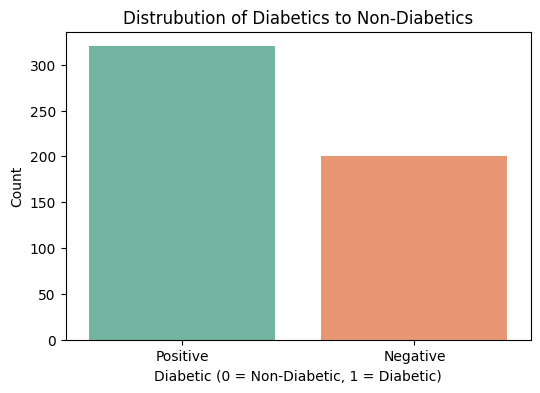

,proportion
class,
Positive,61.538462
Negative,38.461538


In [7]:
# Plot the distribution of Diabetics to Non-Diabetics target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')

# Add labels and title
plt.title('Distrubution of Diabetics to Non-Diabetics')
plt.xlabel('Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')

# Show the plot
plt.show()

df['class'].value_counts(normalize=True) * 100

**Preprocessing**

In [8]:
#look for duplicates
df.duplicated().value_counts()

#drop duplicates
df.drop_duplicates(inplace=True)

/tmp/ipython-input-70505371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


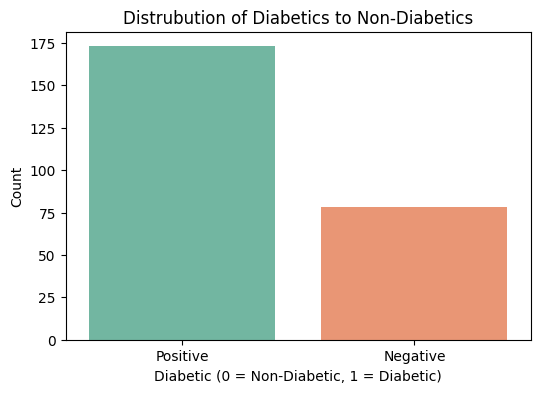

,proportion
class,
Positive,68.924303
Negative,31.075697


In [9]:
# Plot the distribution of Diabetics to Non-Diabetics target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')

# Add labels and title
plt.title('Distrubution of Diabetics to Non-Diabetics')
plt.xlabel('Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')

# Show the plot
plt.show()

df['class'].value_counts(normalize=True) * 100

In [12]:
#Transform the binary data to 1s and 0s
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

columns_to_encode = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**Train Test Split**

In [13]:
#Define X and y variables
y = df['class']
X = df.drop('class', axis=1)

#Train model with 75% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

**Training Model**

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=42)

# Fit
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

**Evaluation**

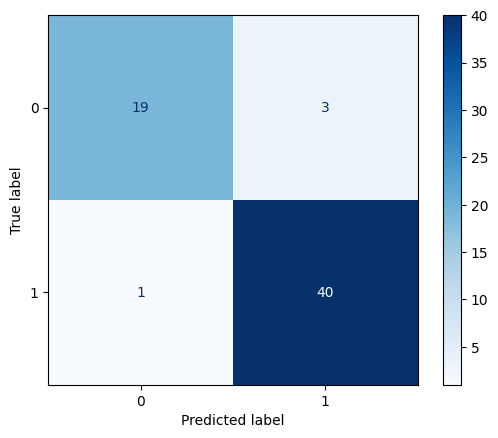

Accuracy Score: 0.9365079365079365


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.show()


In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

# Predictions already made
y_pred = classifier.predict(X_test)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# F-1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy Score: 0.9365079365079365
Recall: 0.975609756097561
Precision: 0.9302325581395349
F1 Score: 0.9523809523809523
